Data comes from 
[here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection)

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from skimage.io import imread_collection
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.neighbors import BallTree

In [ ]:
images_path = '/content/drive/MyDrive/Colab Notebooks/UTEC - IA/data/dataset_cluster/brain_tumor_dataset'

In [ ]:
def load_images_from_folder(folder, gray = True):
    images = []
    for filename in os.listdir(folder):
      if gray:
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
      else:
        img = cv2.imread(os.path.join(folder,filename))
      if img is not None:
        images.append(img)
    return images

images_yes = load_images_from_folder( images_path + "/yes", False)
images_no = load_images_from_folder( images_path + "/no", False)

In [ ]:
images_path = '/content/drive/MyDrive/Colab Notebooks/UTEC - IA/data/dataset_cluster/brain_tumor_dataset'
image = cv2.imread(images_path+'photo_indhira.png')
img_flat = image.flatten()

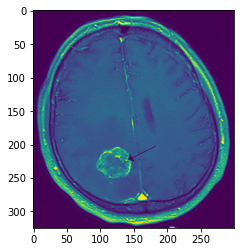

In [ ]:
plt.imshow(images_yes[0])

In [ ]:
image = images_yes[0]
#image[0][0][0]

1

In [ ]:
def distance(cluster , point):
  #return np.sqrt(np.sum((image[x_c][y_c] - image[x_i][y_i]) ** 2) )
  return np.sqrt(np.sum((cluster - point) ** 2) )

In [ ]:
def distance_alt(clust, point):
  #return np.sqrt(np.sum(np.max(clust - point)) )
  return np.max(np.abs(clust - point))

In [ ]:
image = images_yes[0]
max_x = image.shape[0]
max_y = image.shape[1]
k = 20
clusters = []
for i in range(k):
  x_i = np.random.randint(max_x)
  y_i = np.random.randint(max_y)
  clusters.append((x_i, y_i, image[x_i][y_i][0], image[x_i][y_i][1], image[x_i][y_i][2]))
clusters


[(161, 77, 73, 73, 73),
 (74, 212, 53, 53, 53),
 (233, 266, 46, 46, 46),
 (60, 141, 68, 68, 68),
 (276, 81, 40, 40, 40),
 (216, 66, 65, 65, 65),
 (43, 293, 0, 0, 0),
 (277, 224, 13, 13, 13),
 (200, 109, 76, 76, 76),
 (260, 106, 71, 71, 71),
 (54, 151, 84, 84, 84),
 (278, 22, 0, 0, 0),
 (160, 189, 79, 79, 79),
 (15, 231, 0, 0, 0),
 (201, 176, 79, 79, 79),
 (88, 111, 80, 80, 80),
 (278, 101, 86, 86, 86),
 (99, 232, 54, 54, 54),
 (54, 283, 1, 1, 1),
 (277, 54, 11, 11, 11)]

In [ ]:
mat_dist = np.ones(shape = (max_x, max_y)) * 10**6
mat_clust = np.ones(shape = (max_x, max_y))
while True:
  for i in range(max_x):
    for j in range(max_y):
      for k_i in range(k):
        point = np.array([i, j, image[i][j][0], image[i][j][1], image[i][j][2]])
        dist_cur = distance(clusters[k_i], point)
        if dist_cur < mat_dist[i][j]:
          mat_dist[i][j] = dist_cur
          mat_clust[i][j] = k_i
  clusters_x = np.zeros(k)
  clusters_y = np.zeros(k)
  clusters_r = np.zeros(k)
  clusters_g = np.zeros(k)
  clusters_b = np.zeros(k)
  clusters_cont = np.zeros(k)
  print(clusters_x.shape, clusters_y.shape)
  for i in range(max_x):
    for j in range(max_y):
      clust = mat_clust[i][j]
      #print(clust)
      clusters_x[int(clust)] += i
      clusters_y[int(clust)] += j
      clusters_r[int(clust)] += image[i][j][0]
      clusters_g[int(clust)] += image[i][j][1]
      clusters_b[int(clust)] += image[i][j][2]
      clusters_cont[int(clust)] += 1
  clusters_new = []
  for k_i in range(k):
    clusters_new.append((int(clusters_x[k_i] / clusters_cont[k_i]), 
                         int(clusters_y[k_i] / clusters_cont[k_i]), 
                         int(clusters_r[k_i] / clusters_cont[k_i]),
                         int(clusters_g[k_i] / clusters_cont[k_i]),
                         int(clusters_b[k_i] / clusters_cont[k_i])))
  print(clusters)
  print(clusters_new)
  if (distance_alt(np.array(clusters_new), clusters) <= k):
    break
  clusters = clusters_new.copy()

(20,) (20,)
[(161, 77, 73, 73, 73), (74, 212, 53, 53, 53), (233, 266, 46, 46, 46), (60, 141, 68, 68, 68), (276, 81, 40, 40, 40), (216, 66, 65, 65, 65), (43, 293, 0, 0, 0), (277, 224, 13, 13, 13), (200, 109, 76, 76, 76), (260, 106, 71, 71, 71), (54, 151, 84, 84, 84), (278, 22, 0, 0, 0), (160, 189, 79, 79, 79), (15, 231, 0, 0, 0), (201, 176, 79, 79, 79), (88, 111, 80, 80, 80), (278, 101, 86, 86, 86), (99, 232, 54, 54, 54), (54, 283, 1, 1, 1), (277, 54, 11, 11, 11)]
[(139, 50, 64, 64, 64), (65, 203, 60, 60, 60), (221, 254, 50, 50, 50), (36, 84, 28, 28, 28), (288, 109, 31, 31, 31), (212, 53, 69, 69, 69), (23, 285, 0, 0, 0), (292, 242, 9, 9, 9), (194, 117, 78, 78, 78), (263, 126, 66, 66, 66), (53, 168, 116, 116, 116), (263, 16, 1, 1, 1), (150, 209, 89, 89, 89), (17, 208, 2, 2, 2), (226, 194, 84, 84, 84), (86, 85, 74, 74, 74), (275, 112, 149, 149, 149), (117, 241, 65, 65, 65), (84, 277, 1, 1, 1), (296, 70, 4, 4, 4)]
(20,) (20,)
[(139, 50, 64, 64, 64), (65, 203, 60, 60, 60), (221, 254, 50, 50

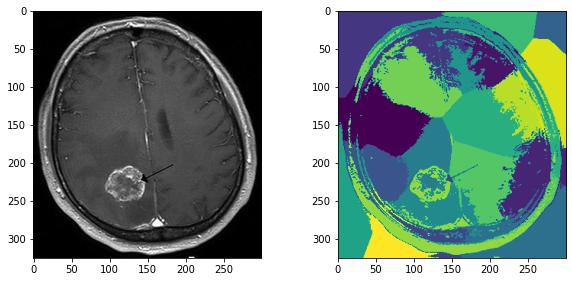

In [ ]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(mat_clust)

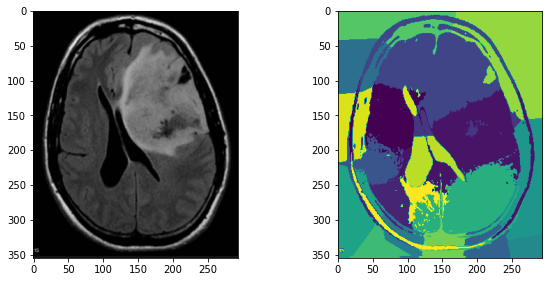

In [ ]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(mat_clust)

In [ ]:
mat_clust

array([[2., 2., 2., ..., 0., 0., 1.],
       [2., 2., 2., ..., 0., 0., 1.],
       [3., 3., 3., ..., 3., 3., 0.],
       ...,
       [2., 3., 3., ..., 3., 0., 0.],
       [0., 2., 1., ..., 3., 0., 0.],
       [2., 3., 1., ..., 2., 2., 0.]])